In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.preprocessing import LabelEncoder


#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
import os
os.chdir('C:/Users/cui62/Desktop/zentativity/Kaggle_Forecasting Mini-Course Sales')

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

In [65]:
train

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641


In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   date      136950 non-null  object
 2   country   136950 non-null  object
 3   store     136950 non-null  object
 4   product   136950 non-null  object
 5   num_sold  136950 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.3+ MB


3 categorical columns: Country, Store and Product.

In [63]:
test

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better
...,...,...,...,...,...
27370,164320,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding
27371,164321,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs
27372,164322,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People
27373,164323,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions


In [12]:
submission

,id,num_sold
0,136950,100
1,136951,100
2,136952,100
3,136953,100
4,136954,100
...,...,...
27370,164320,100
27371,164321,100
27372,164322,100
27373,164323,100


In [13]:
train.isnull().sum(), test.isnull().sum()

(id          0
 date        0
 country     0
 store       0
 product     0
 num_sold    0
 dtype: int64,
 id         0
 date       0
 country    0
 store      0
 product    0
 dtype: int64)

In [14]:
desc = pd.DataFrame(index = list(train))
desc['count'] = train.count()
desc['nunique'] = train.nunique()
desc['%unique'] = desc['nunique'] / len(train) * 100
desc['null'] = train.isnull().sum()
desc['type'] = train.dtypes
desc = pd.concat([desc, train.describe().T.drop('count', axis = 1)], axis = 1)
desc

,count,nunique,%unique,null,type,mean,std,min,25%,50%,75%,max
id,136950,136950,100.000000,0,int64,68474.500000,39534.204020,0.0,34237.25,68474.5,102711.75,136949.0
date,136950,1826,1.333333,0,datetime64[ns],NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,136950,5,0.003651,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store,136950,3,0.002191,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,136950,5,0.003651,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_sold,136950,1028,0.750639,0,int64,165.522636,183.691575,2.0,46.00,98.0,184.00,1380.0


In [15]:
train.store.unique(), test.store.unique()

(array(['Kaggle Learn', 'Kaggle Store', 'Kagglazon'], dtype=object),
 array(['Kaggle Learn', 'Kaggle Store', 'Kagglazon'], dtype=object))

In [16]:
train.country.unique(), test.country.unique()

(array(['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'], dtype=object),
 array(['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'], dtype=object))

In [17]:
train['product'].unique(),test['product'].unique()

(array(['Using LLMs to Improve Your Coding',
        'Using LLMs to Train More LLMs',
        'Using LLMs to Win Friends and Influence People',
        'Using LLMs to Win More Kaggle Competitions',
        'Using LLMs to Write Better'], dtype=object),
 array(['Using LLMs to Improve Your Coding',
        'Using LLMs to Train More LLMs',
        'Using LLMs to Win Friends and Influence People',
        'Using LLMs to Win More Kaggle Competitions',
        'Using LLMs to Write Better'], dtype=object))

In [18]:
train.shape, test.shape

((136950, 6), (27375, 5))

After some data observations, we know there are:
1. The Train dataset contains 136,950 rows and 6 columns. The test dataset contains 27375 rows and 5 columns.
2. 3 stores: 'Kaggle Learn', 'Kaggle Store', 'Kagglazon'
3. 5 countries: 'Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'
4. 5 products: 
        'Using LLMs to Improve Your Coding',
        'Using LLMs to Train More LLMs',
        'Using LLMs to Win Friends and Influence People',
        'Using LLMs to Win More Kaggle Competitions',
        'Using LLMs to Write Better'
5. No Null vlaues
6. Data type for each column: 'id' (integer), 'date' (object), 'country' (object), 'store' (object), 'product' (object), and 'num_sold' (integer).

In [6]:
df1=train.groupby(by=['country', 'store']).date.agg(('min', 'max'))
df1



min         max
country   store                               
Argentina Kagglazon     2017-01-01  2021-12-31
          Kaggle Learn  2017-01-01  2021-12-31
          Kaggle Store  2017-01-01  2021-12-31
Canada    Kagglazon     2017-01-01  2021-12-31
          Kaggle Learn  2017-01-01  2021-12-31
          Kaggle Store  2017-01-01  2021-12-31
Estonia   Kagglazon     2017-01-01  2021-12-31
          Kaggle Learn  2017-01-01  2021-12-31
          Kaggle Store  2017-01-01  2021-12-31
Japan     Kagglazon     2017-01-01  2021-12-31
          Kaggle Learn  2017-01-01  2021-12-31
          Kaggle Store  2017-01-01  2021-12-31
Spain     Kagglazon     2017-01-01  2021-12-31
          Kaggle Learn  2017-01-01  2021-12-31
          Kaggle Store  2017-01-01  2021-12-31

In [7]:
df2=test.groupby(by=['country', 'store']).date.agg(('min', 'max'))
df2

min         max
country   store                               
Argentina Kagglazon     2022-01-01  2022-12-31
          Kaggle Learn  2022-01-01  2022-12-31
          Kaggle Store  2022-01-01  2022-12-31
Canada    Kagglazon     2022-01-01  2022-12-31
          Kaggle Learn  2022-01-01  2022-12-31
          Kaggle Store  2022-01-01  2022-12-31
Estonia   Kagglazon     2022-01-01  2022-12-31
          Kaggle Learn  2022-01-01  2022-12-31
          Kaggle Store  2022-01-01  2022-12-31
Japan     Kagglazon     2022-01-01  2022-12-31
          Kaggle Learn  2022-01-01  2022-12-31
          Kaggle Store  2022-01-01  2022-12-31
Spain     Kagglazon     2022-01-01  2022-12-31
          Kaggle Learn  2022-01-01  2022-12-31
          Kaggle Store  2022-01-01  2022-12-31

# Exploratory Data Analysis

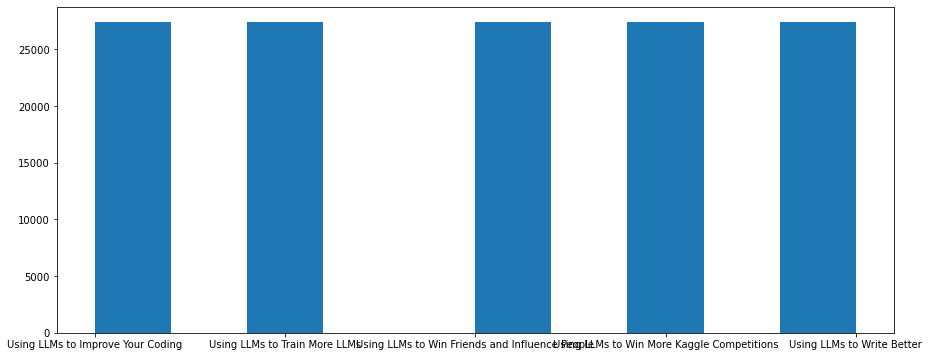

In [19]:
plt.figure(figsize= (15, 6))
plt.hist(train['product'])
plt.show()

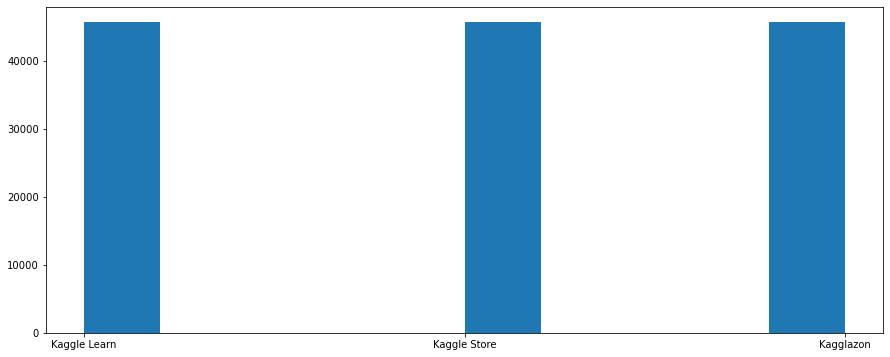

In [20]:
plt.figure(figsize= (15, 6))
plt.hist(train['store'])
plt.show()

all the unique product/store in the 'train' dataset have the same count or frequency. 

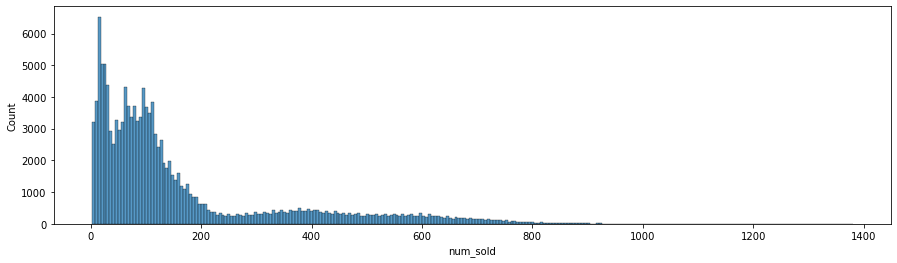

In [21]:
plt.figure(figsize=[15,4])
sns.histplot(train['num_sold'])
plt.show()

1. Highest num_sold around 6500 per day.
2. Left skewness
3. Average num_sold around 100.

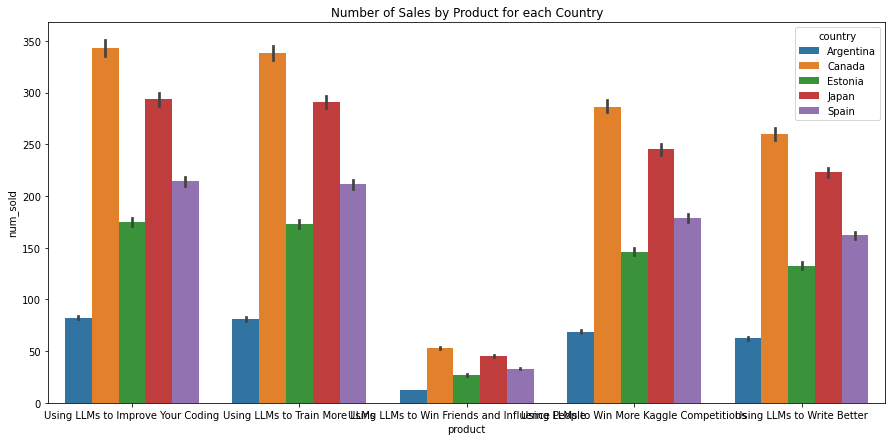

In [22]:
plt.figure(figsize=(15,7))
ax = sns.barplot(data=train, x='product', y='num_sold', hue='country')
plt.title("Number of Sales by Product for each Country")
plt.show()

1. From the above barplot, Using LLMs to Improve Your Coding','Using LLMs to Train More LLMs', has highest number of sales among 5 countries

2. Canada and Japan have higher sold quantites for all products as compared with other.


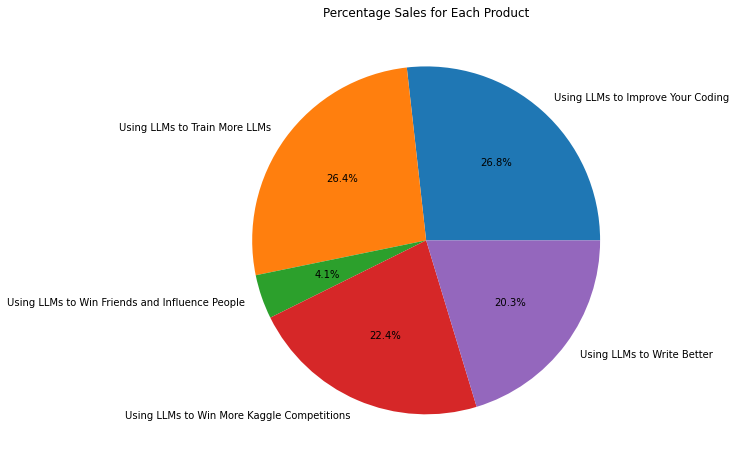

In [30]:
product_sales = train.groupby('product')['num_sold'].sum().reset_index()

# Calculate percentage sales for each product
product_sales['percentage_sales'] = (product_sales['num_sold'] / product_sales['num_sold'].sum()) * 100

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(product_sales['percentage_sales'], labels=product_sales['product'], autopct='%1.1f%%')
plt.title('Percentage Sales for Each Product')
plt.show()

'Using LLMs to Win Friends and Influence People' has the lowest sold numbers. Not a popular pick.

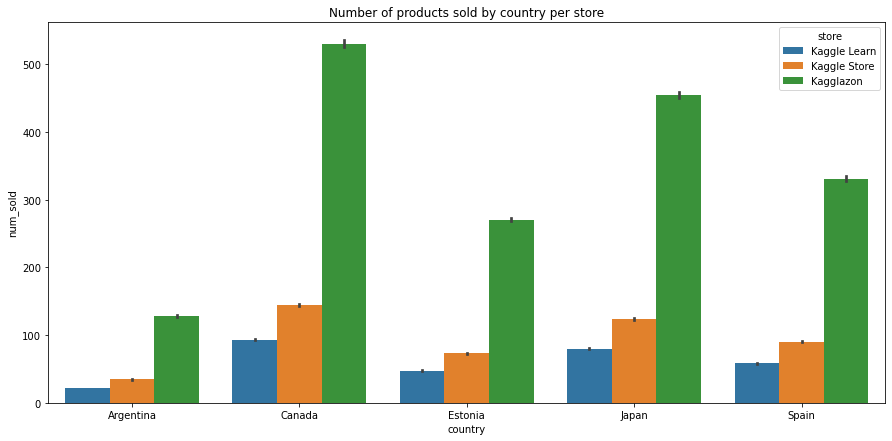

In [31]:
plt.figure(figsize= (15, 7))
sns.barplot(x='country', y='num_sold',data = train,hue = 'store')
plt.title('Number of products sold by country per store')
plt.show()

Kagglazon highest sales and Kaggle Learn lowest in all 5 countries.

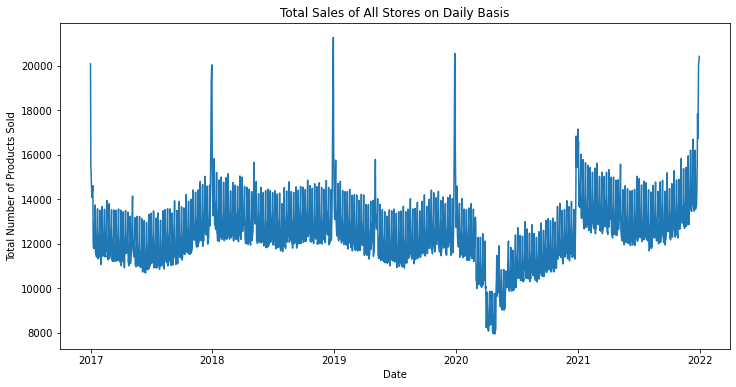

In [32]:
daily_total_sales = train.groupby('date')['num_sold'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(daily_total_sales['date'], daily_total_sales['num_sold'])
plt.xlabel('Date')
plt.ylabel('Total Number of Products Sold')
plt.title('Total Sales of All Stores on Daily Basis')

plt.show()

There’s a clear sales peak happeded on every year's January. Holiday Season.
Seasonal Trend: This refers to patterns that repeat at regular intervals, such as daily, weekly, monthly, or yearly. Seasonal trends are often associated with events like holidays or specific seasons, and they can significantly impact sales.



A decreased sales trend happened in the year of 2020 around March.




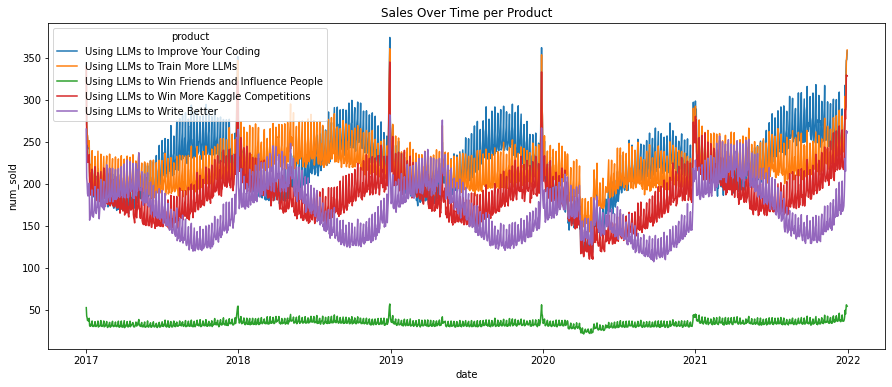

In [33]:
plt.figure(figsize=(15, 6))

sns.lineplot(data = train, x = 'date', y = 'num_sold', hue = 'product', errorbar = None)
    
plt.title('Sales Over Time per Product')
plt.show()

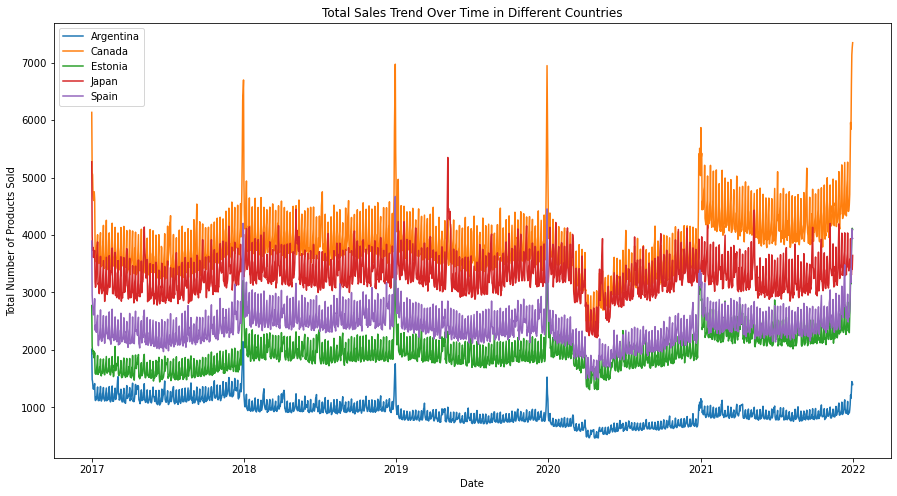

In [34]:
# Group and Aggregate Data for each country
countries = ['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain']  # Replace with your desired countries
fig, ax = plt.subplots(figsize=(15, 8))

for country in countries:
    country_data = train[train['country'] == country]
    daily_total_sales = country_data.groupby('date')['num_sold'].sum().reset_index()
    ax.plot(daily_total_sales['date'], daily_total_sales['num_sold'], label=country)

# Plot Formatting
plt.xlabel('Date')
plt.ylabel('Total Number of Products Sold')
plt.title('Total Sales Trend Over Time in Different Countries')
plt.legend()
plt.show()



In [10]:
import requests

def get_gdp_per_capita(country,year):
    alpha3 = {'Argentina':'ARG','Canada':'CAN','Estonia':'EST','Japan':'JPN','Spain':'ESP'}
    url="https://api.worldbank.org/v2/country/{0}/indicator/NY.GDP.PCAP.CD?date={1}&format=json".format(alpha3[country],year)
    response = requests.get(url).json()
    return response[1][0]['value']



In [11]:
gdp = []
for country in train.country.unique():
    row = []
    for year in range(2017,2023):
        row.append(get_gdp_per_capita(country,year))
    gdp.append(row)

gdp = np.array(gdp)
gdp /= np.sum(gdp,axis=0)

rel_gdp_df = pd.DataFrame(gdp,index=train.country.unique(),columns=range(2017,2023))

rel_gdp_df

,2017,2018,2019,2020,2021,2022
Argentina,0.099274,0.077784,0.066531,0.059671,0.066117,0.085457
Canada,0.306587,0.306963,0.309657,0.304448,0.325473,0.343217
Estonia,0.138844,0.152769,0.156414,0.165711,0.173705,0.176912
Japan,0.263819,0.262142,0.269872,0.280831,0.247575,0.211147
Spain,0.191477,0.200342,0.197526,0.189340,0.187131,0.183266


In [14]:
df = train.groupby(['date','country'])[['num_sold']].sum().reset_index().join(
                        train.groupby('date')[['num_sold']].sum(), on='date',rsuffix='_total')
df['date'] = pd.to_datetime(df['date'])

In [15]:
df['fractions'] = df['num_sold']/df['num_sold_total']
df['rel_gdp'] = df.apply(lambda s: rel_gdp_df.loc[s.country,s.date.year],axis=1)

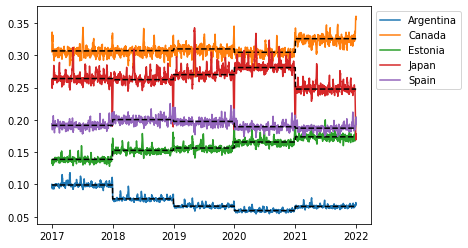

In [16]:
for country in df['country'].unique():
    X = df[df['country']==country]
    plt.plot(X['date'],X['fractions'],label=country)
    plt.plot(X['date'],X['rel_gdp'],'k--')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()